<a href="https://colab.research.google.com/github/MLUISG/Projects/blob/main/Mark_Guereque_Project_1v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Business Problem
Can we predict if a customer will make future transactions using gaussian naive bayes?

### Imports, mounting, and tools


In [ ]:
#3

from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
#2

train_path = '/drive/My Drive/Project 1/Train.csv'
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.fromnumeric import shape
import sklearn
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets, metrics, model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pandas as pd
import seaborn as sns

In [ ]:
train_orig = pd.read_csv(train_path)

###Homemade Functions


In [ ]:
# Homemade Functions

def show_me(money):
  """Displays info, describe, head, and tail"""
  print('Info')  
  print(money.info())
  print('\n')
  print('\n')
  print('Described')
  print(money.describe().T)
  print('\n')
  print('\n')
  print('Head')
  print(money.head().T)
  print('\n')
  print('\n')
  print('Tail')
  print(money.tail().T)

In [ ]:
def count_nulls(data):
    """Checks for null values and displays only nulls"""
    temp = data.isna().sum()
    filter = temp > 0
    print(data.shape)
    print(temp[filter])

#Data Examination

In [ ]:
#4

show_me(train_orig)

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 1

In [ ]:
shape(train_orig)

(180000, 53)

In [ ]:
count_nulls(train_orig)

(180000, 53)
Series([], dtype: int64)


#Data Cleaning
After examining the data I've determined that I don't need the Unnamed: 0 and ID_code because they don't offer me anything beyond an indexing number.


In [ ]:
target_var = train_orig.copy()
target_var.drop(['Unnamed: 0', 'ID_code'], axis=1, inplace=True)

In [ ]:
target_var

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
target_var_drop = target_var.drop(['target'], axis=1)

In [ ]:
target_var_drop

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,3.6973,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,3.2069,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,3.3400,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,3.7526,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [ ]:
random_working_sample = target_var.sample(n = 100000)

In [ ]:
random_working_sample

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
162037,0,12.7254,4.2790,11.0801,4.1580,8.6829,14.2418,7.3952,12.0064,17.4141,...,5.0746,2.8354,-6.4208,8.8998,-0.0440,6.6946,-1.7914,5.7639,-0.1489,15.6075
116744,0,14.3779,-3.3525,8.0080,5.0633,7.8669,13.8357,11.9661,6.7921,9.0837,...,5.8110,-5.0432,12.0513,25.4812,5.6455,18.9392,11.6487,1.6385,1.6668,19.4082
116991,0,6.7160,-0.1528,11.5232,5.5918,8.6071,13.8772,3.5950,12.5977,30.7287,...,5.3971,3.5323,-0.9714,30.1417,-0.1583,9.4368,9.8709,5.5151,-0.3048,17.6146
76222,0,7.4956,-2.9526,12.4612,4.4537,5.9665,14.2145,-2.8391,8.6042,6.2698,...,6.2896,-0.3803,-3.9940,23.1380,6.0021,17.7307,0.6225,9.1291,4.1349,10.6253
24314,1,8.3474,4.3040,12.5289,5.7204,8.9810,13.9833,1.9470,20.4419,13.0380,...,5.2079,2.6066,-8.2933,20.5280,5.1753,18.3253,-1.1842,6.4678,-0.7692,15.0871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75769,0,8.1696,-2.8578,8.2374,5.9295,7.2459,13.8360,13.9907,11.6843,24.4627,...,5.8878,-5.6018,-6.8625,31.5796,3.7057,6.5618,5.8235,10.7857,1.7989,18.3440
111821,0,9.4777,5.4243,13.3299,4.9235,9.8055,13.7045,13.0982,13.8719,20.2803,...,5.5872,-4.7530,-11.1939,14.6679,0.4172,-3.6522,3.1413,8.7978,3.2355,19.4355
142077,0,10.2514,2.0407,6.7023,6.2719,5.4695,13.9116,8.3276,22.1695,12.2231,...,4.9069,2.9817,-6.3773,15.9910,6.4743,11.2269,11.8607,12.1503,1.5306,11.0860
109112,0,7.0396,-2.1471,10.0949,4.4698,7.7848,14.1048,11.1795,25.1057,17.6928,...,5.5398,-9.4948,-7.0857,34.1080,5.0228,15.8890,-0.4961,4.0085,2.1714,12.6198


#Exploratory Data Analysis
Here I'm going to explore the data by creating visuals and sample variables.

In [ ]:
#6 Plots

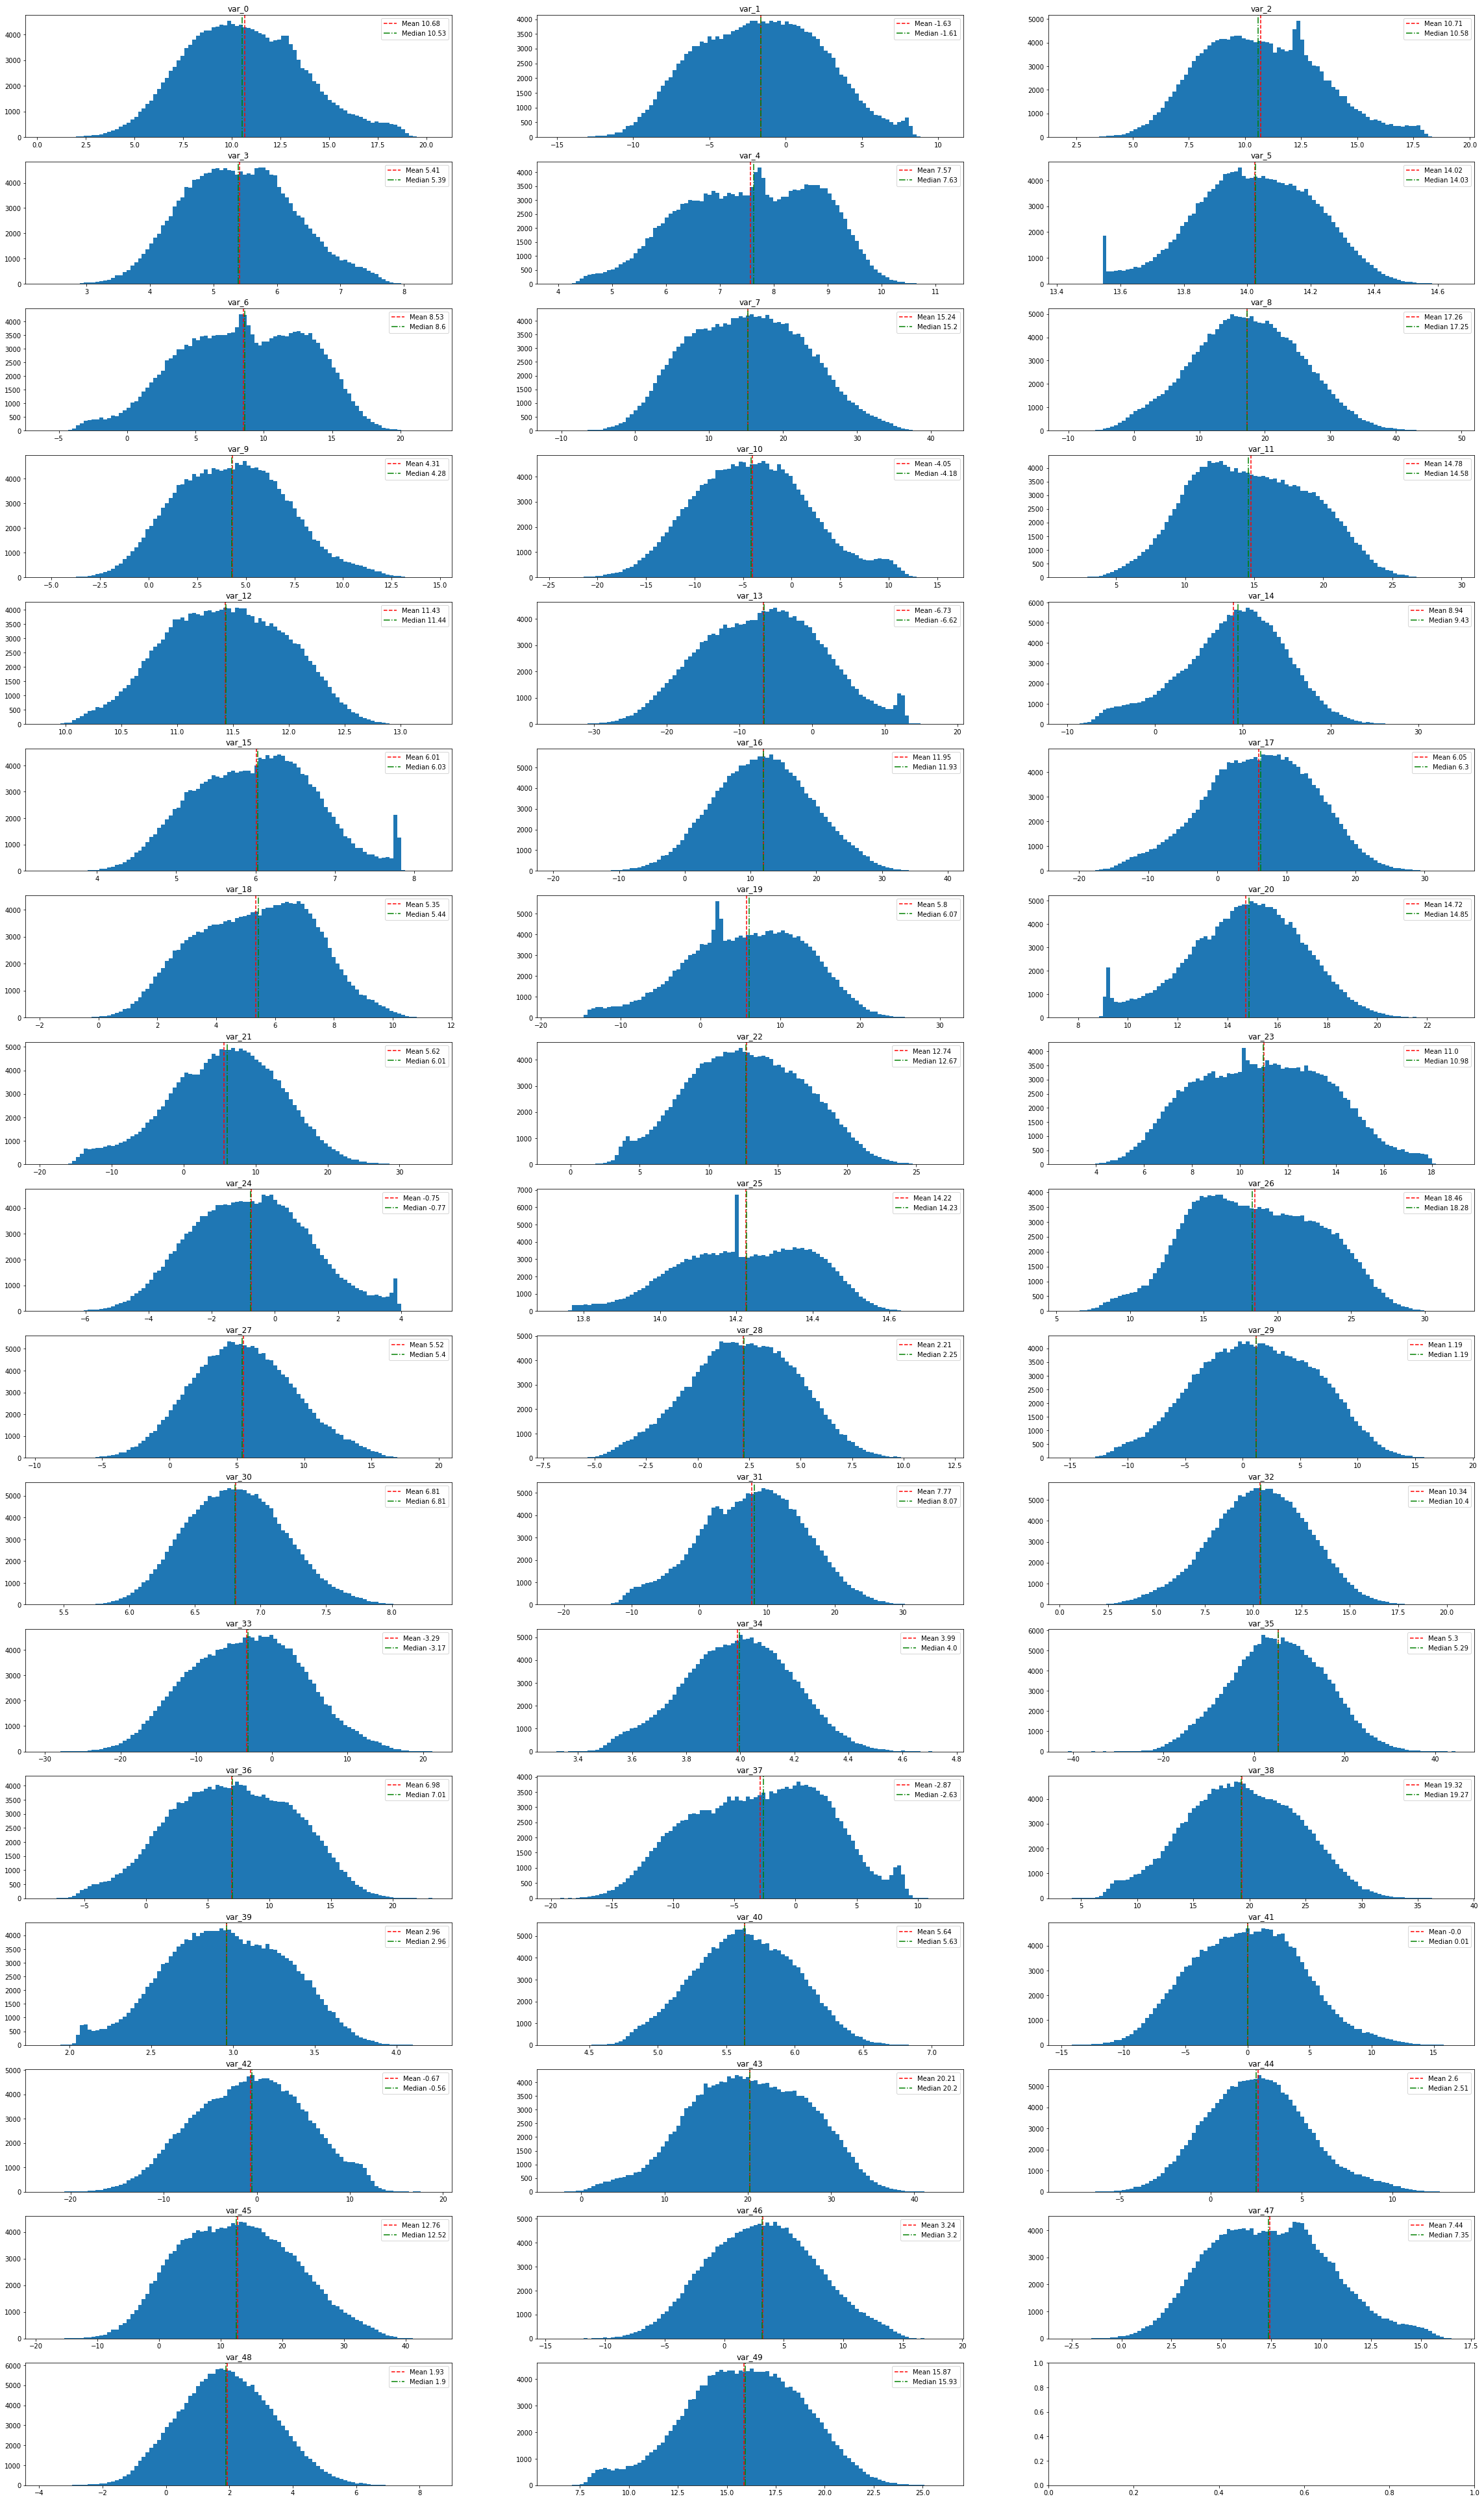

In [ ]:
fig, axs = plt.subplots(nrows=17, ncols=3, figsize=(40, 70))
for i, col in enumerate(target_var_drop.columns):
    ax = axs[i // 3, i % 3]  
    ax.hist(target_var_drop[col], bins=100)
    ax.axvline(target_var_drop[col].mean(), color='r', linestyle='--', label=(f'Mean {target_var_drop[col].mean().round(2)}'))
    ax.axvline(target_var_drop[col].median(), color='g', linestyle='-.', label=(f'Median {target_var_drop[col].median().round(2)}'))
    ax.set_title(col)  
    ax.legend()  

In [ ]:
#7

train_orig['target'].value_counts()

0    161960
1     18040
Name: target, dtype: int64

<AxesSubplot:>

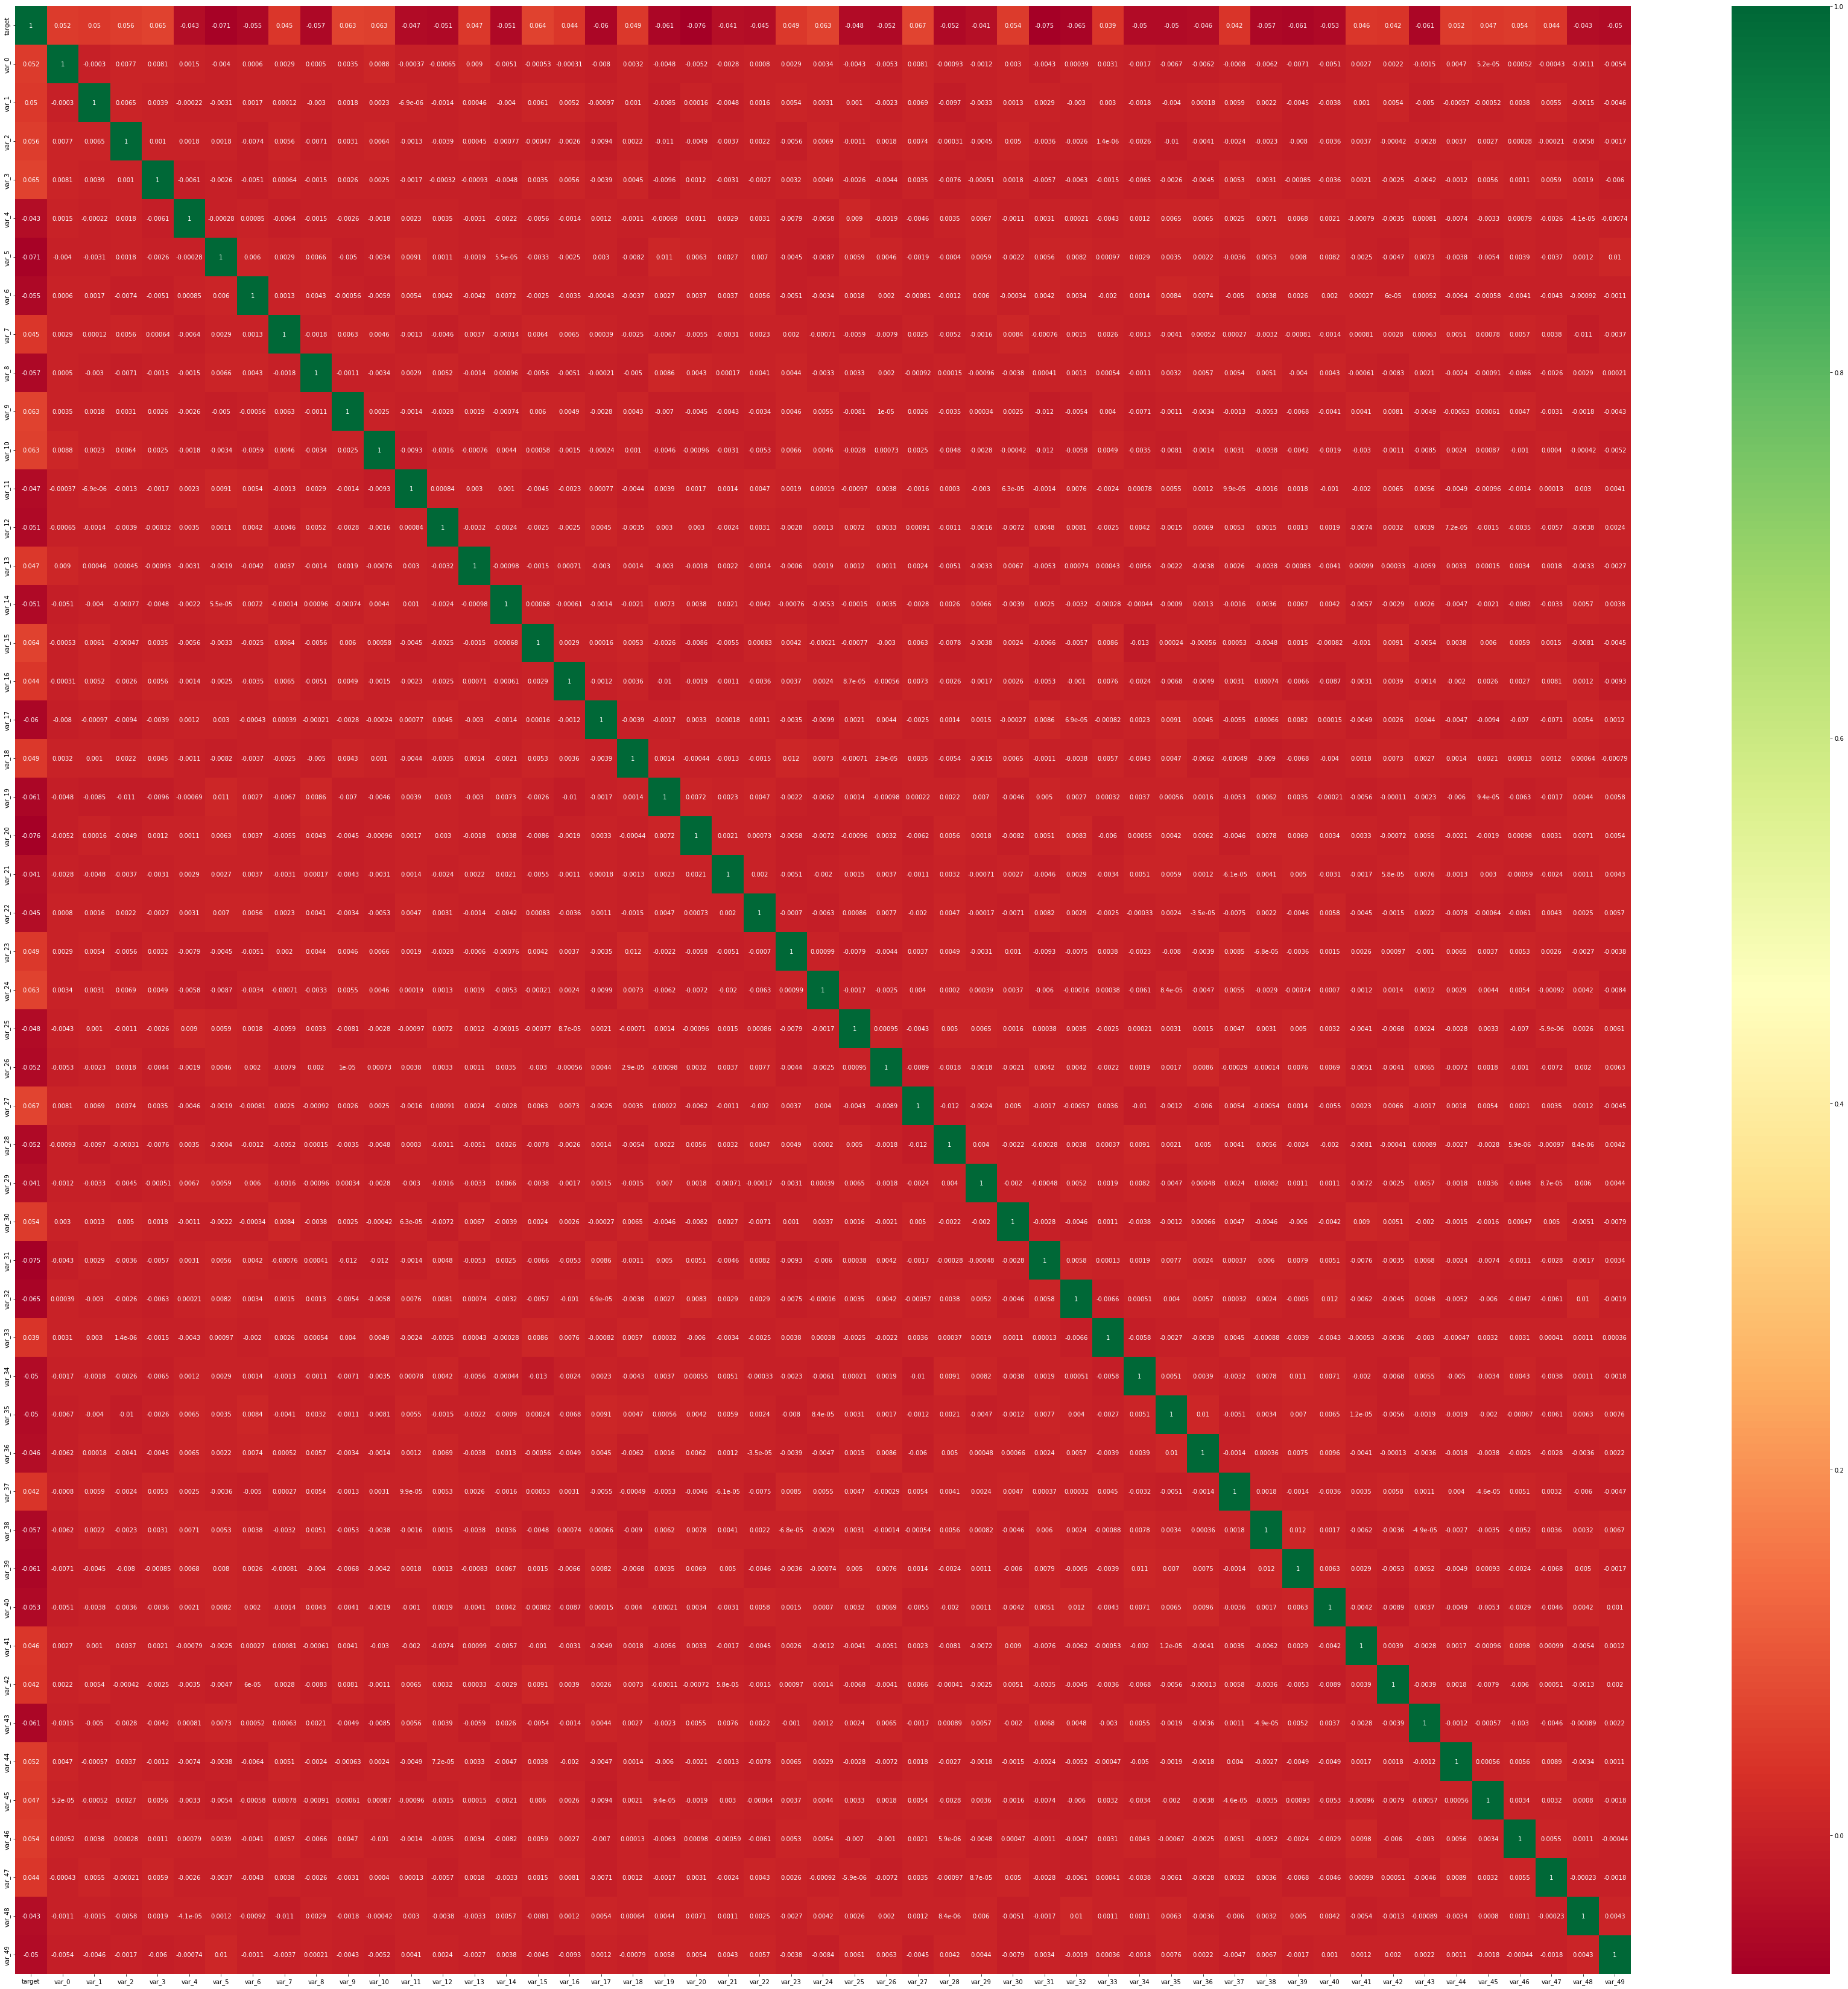

In [ ]:
#8
samp_corr = random_working_sample.corr()
plt.figure(figsize=(60,60))
sns.heatmap(samp_corr, annot=True, cmap='RdYlGn')

In [ ]:
#9

success_df = train_orig[train_orig['target'] == 1].copy()
success_df.drop(['Unnamed: 0', 'ID_code'], axis=1, inplace=True)
success_df['target'].value_counts()

1    18040
Name: target, dtype: int64

In [ ]:
unsuccess_df = train_orig[train_orig['target'] == 0].copy()
unsuccess_df.drop(['Unnamed: 0', 'ID_code'], axis=1, inplace=True)
unsuccess_df['target'].value_counts()

0    161960
Name: target, dtype: int64

#Data Processing
Because I determined there is no correlation between the data I'm going to now create my train and test for Gaussian Naïve Bayes.

In [ ]:
#10

y = random_working_sample['target'].copy()
X = random_working_sample.drop('target', axis=1, inplace=False)

In [ ]:
#11
gnb = GaussianNB()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 20000 points : 1730


In [ ]:
num_loops = 1000
accuracy_scores = np.zeros(num_loops)

In [ ]:
#14
for i in range(num_loops):
    # Create and train a new model for each iteration
    model_split_xv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_xv.fit(X_train, y_train)
    y_split_pred = model_split_xv.predict(X_test)
    # Evaluate the model's accuracy on the test set and store score
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

In [ ]:
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
median_accuracy = np.median(accuracy_scores)
print("Mean accuracy: ", mean_accuracy)
print("Standard deviation of accuracy: ", std_accuracy)
print("Median of accuracy: ", median_accuracy)

Mean accuracy:  0.91129985
Standard deviation of accuracy:  0.0017541315450957482
Median of accuracy:  0.9113249999999999


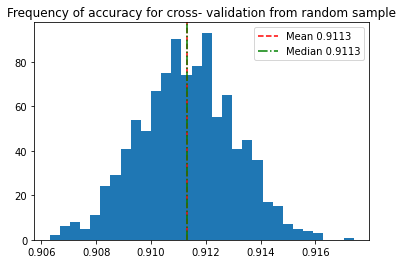

In [ ]:
#16
plt.hist(accuracy_scores, bins=30)
plt.title('Frequency of accuracy for cross- validation from random sample')
plt.axvline(mean_accuracy, color='red', linestyle='--', label=f'Mean {mean_accuracy.round(4)}')
plt.axvline(median_accuracy, color='green', linestyle='-.', label=f'Median {median_accuracy.round(4)}')
plt.legend()
plt.show()

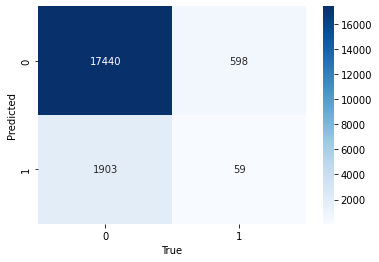

In [ ]:
#17 

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.gca().set_xlabel('True')
plt.gca().set_ylabel('Predicted')
plt.show()

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     18038
           1       0.09      0.03      0.05      1962

    accuracy                           0.87     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.82      0.87      0.85     20000



In [ ]:
#18
success_vs_non = pd.concat([success_df.head(18000), unsuccess_df.head(18000)])

In [ ]:
#19
y = success_vs_non['target'].copy()
X = success_vs_non.drop('target', axis=1, inplace=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 7200 points : 1796


In [ ]:
num_loops = 1000
accuracy_scores = np.zeros(num_loops)

In [ ]:
for i in range(num_loops):
    # Create and train a new model for each iteration
    model_split_xv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_xv.fit(X_train, y_train)
    y_split_pred = model_split_xv.predict(X_test)
    # Evaluate the model's accuracy on the test set and store score
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

In [ ]:
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
median_accuracy = np.median(accuracy_scores)
print("Mean accuracy: ", mean_accuracy)
print("Standard deviation of accuracy: ", std_accuracy)
print("Median of accuracy: ", median_accuracy)

Mean accuracy:  0.7569759722222222
Standard deviation of accuracy:  0.004618111885621358
Median of accuracy:  0.7569444444444444


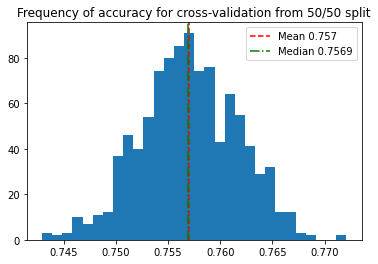

In [ ]:
plt.hist(accuracy_scores, bins=30)
plt.title('Frequency of accuracy for cross-validation from 50/50 split')
plt.axvline(mean_accuracy, color='red', linestyle='--', label=f'Mean {mean_accuracy.round(4)}')
plt.axvline(median_accuracy, color='green', linestyle='-.', label=f'Median {median_accuracy.round(4)}')
plt.legend()
plt.show()

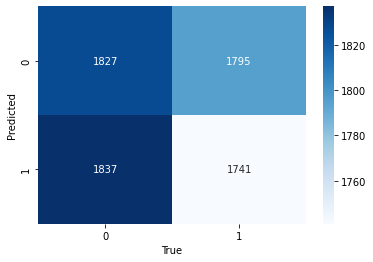

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.gca().set_xlabel('True')
plt.gca().set_ylabel('Predicted')
plt.show()

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      3622
           1       0.49      0.49      0.49      3578

    accuracy                           0.50      7200
   macro avg       0.50      0.50      0.50      7200
weighted avg       0.50      0.50      0.50      7200

